# Medical Cost Insurance - Project: Batch DS2405 -Sofia 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

SyntaxError: invalid syntax (2212258770.py, line 1)

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.shape

(1338, 7)

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

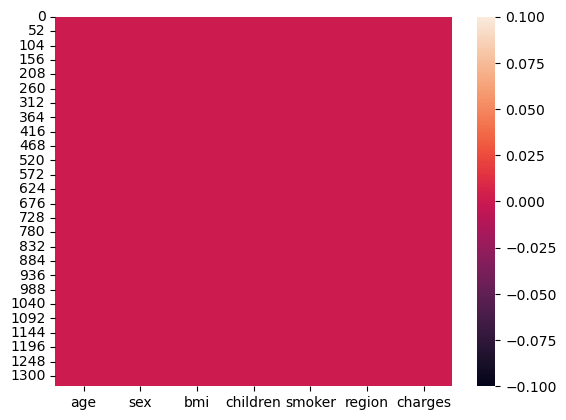

In [12]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [13]:
#Checking number of unique values in each column
df.nunique().to_frame('No of unique values')

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [14]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [15]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns: ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']


In [16]:
#Statistical Summary of new columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


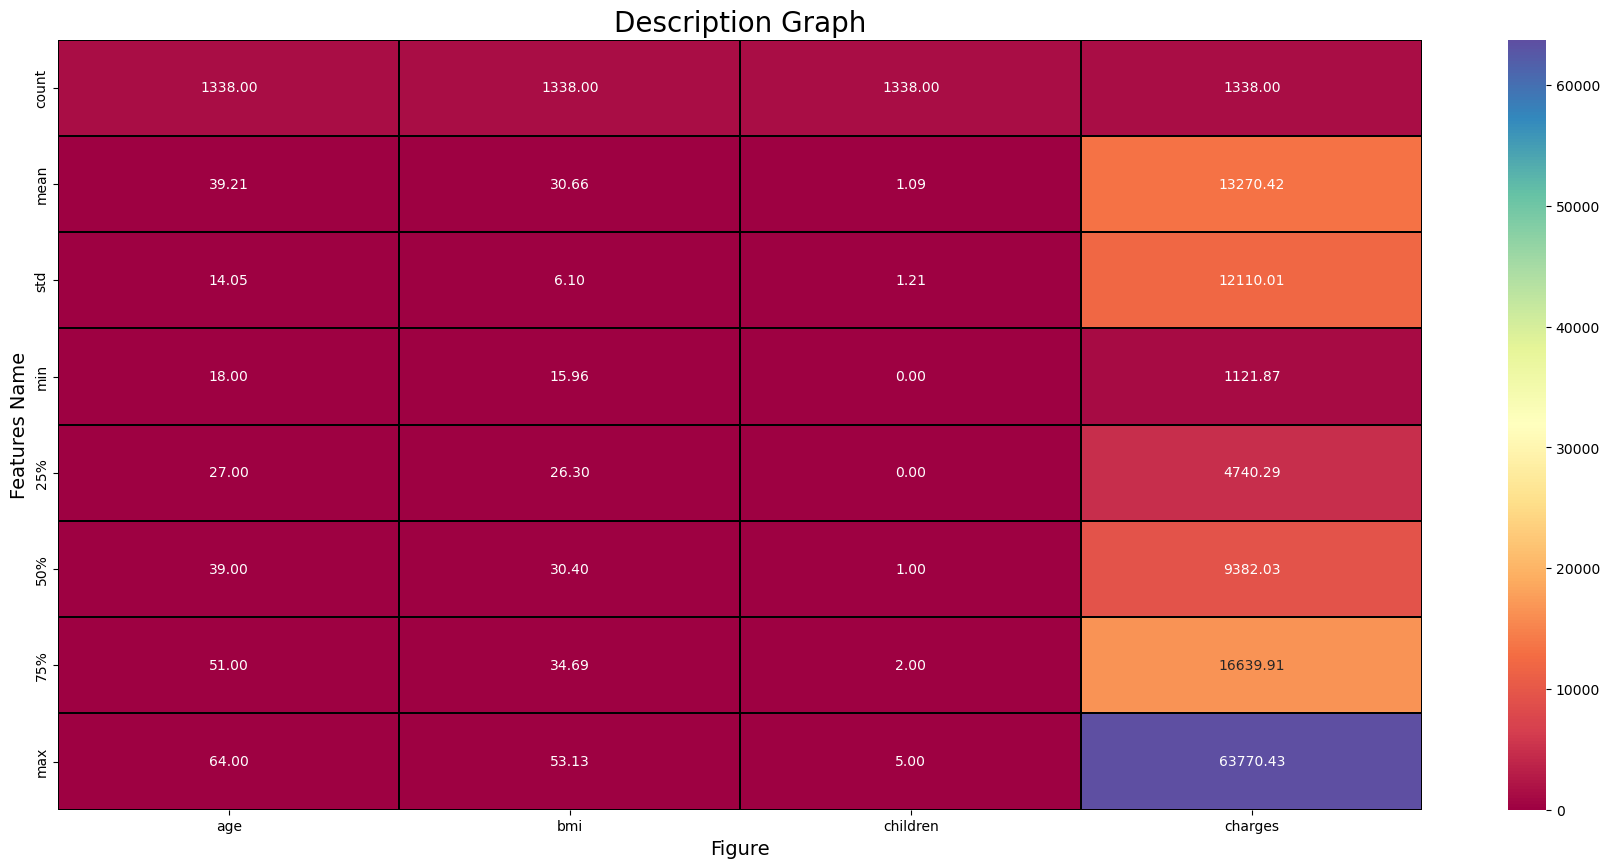

In [17]:
plt.figure(figsize = (22,10))
sns.heatmap(df.describe(),annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features Name', fontsize=14)
plt.title('Description Graph', fontsize=20)
plt.show()

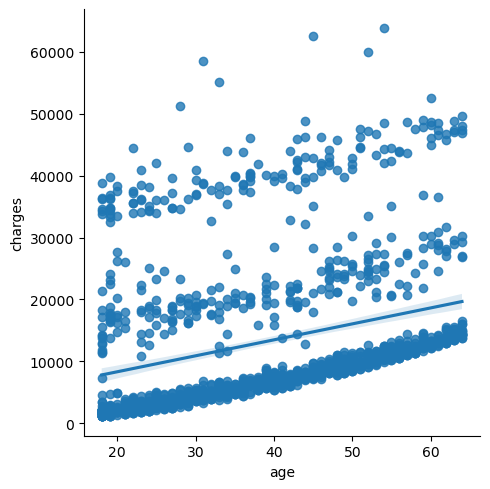

In [18]:
sns.lmplot(x='age', y='charges', data=df, palette='colorblind')

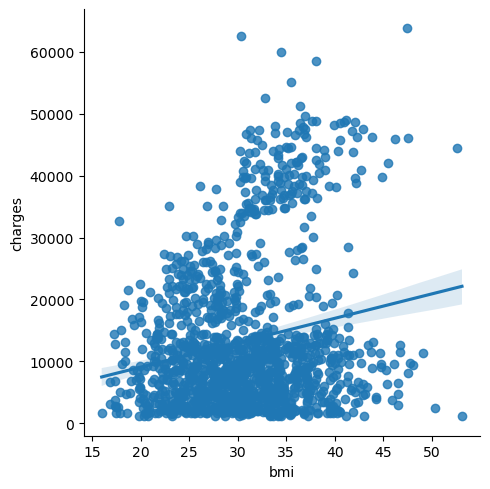

In [19]:
sns.lmplot(x='bmi', y='charges', data=df, palette='colorblind')

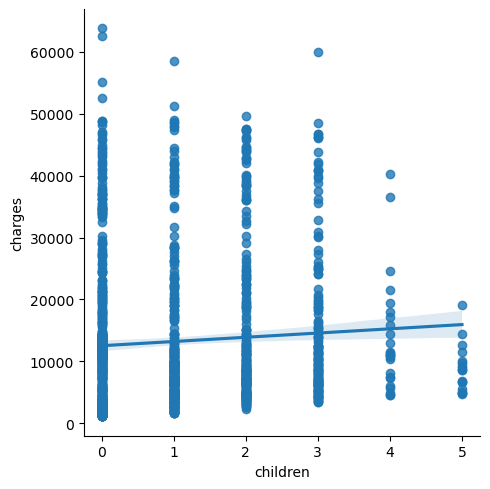

In [20]:

sns.lmplot(x='children', y='charges', data=df, palette='colorblind')

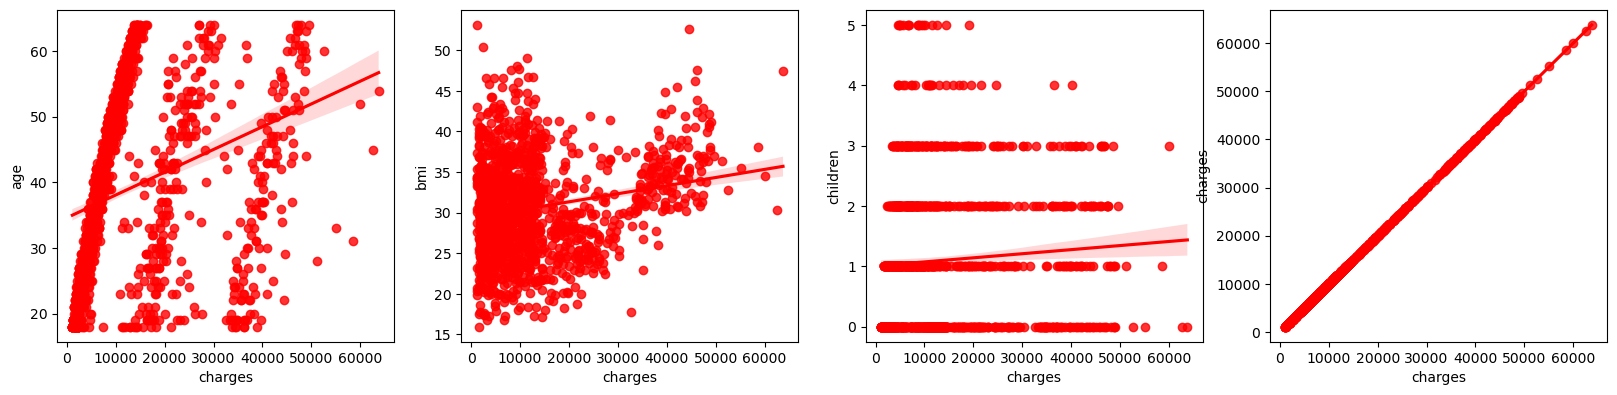

In [21]:
plt.figure(figsize = (20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='charges', y=i, data=df, color='r')
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
    
plt.show()

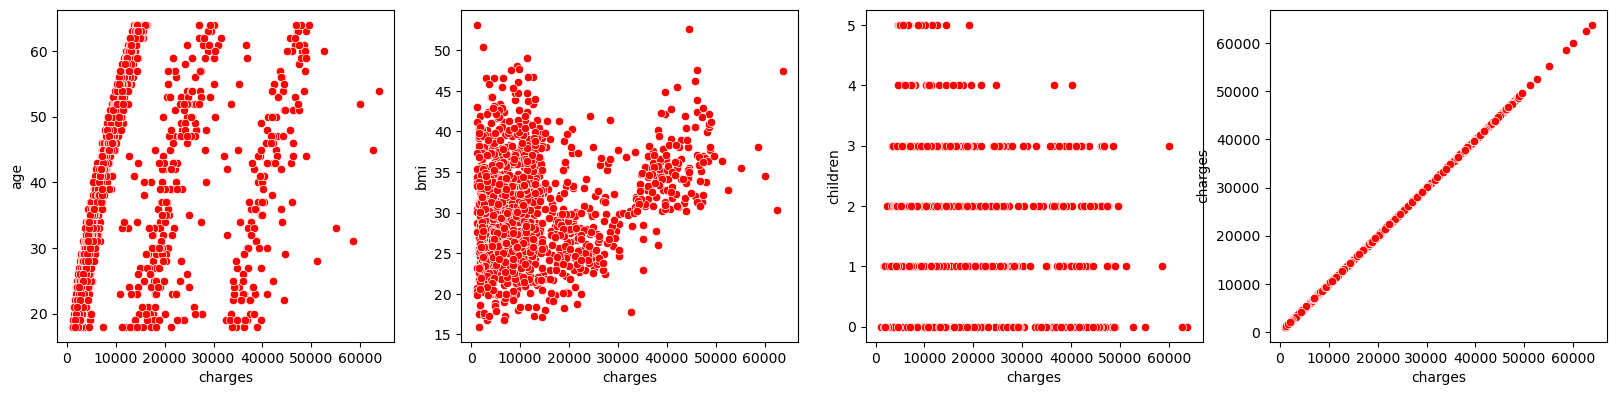

In [22]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='charges', y=i, data=df, color='r')
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
plt.show()

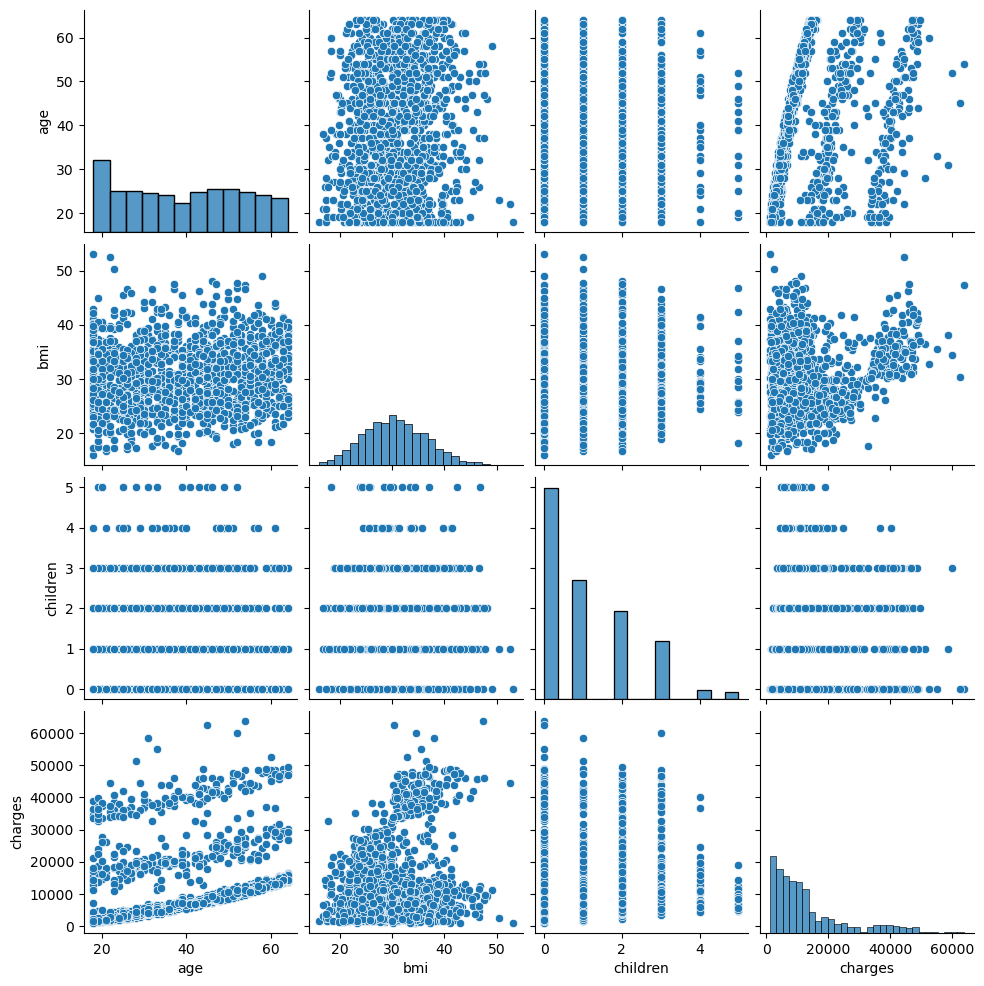

In [23]:
sns.pairplot(data=df, palette='Dark2')

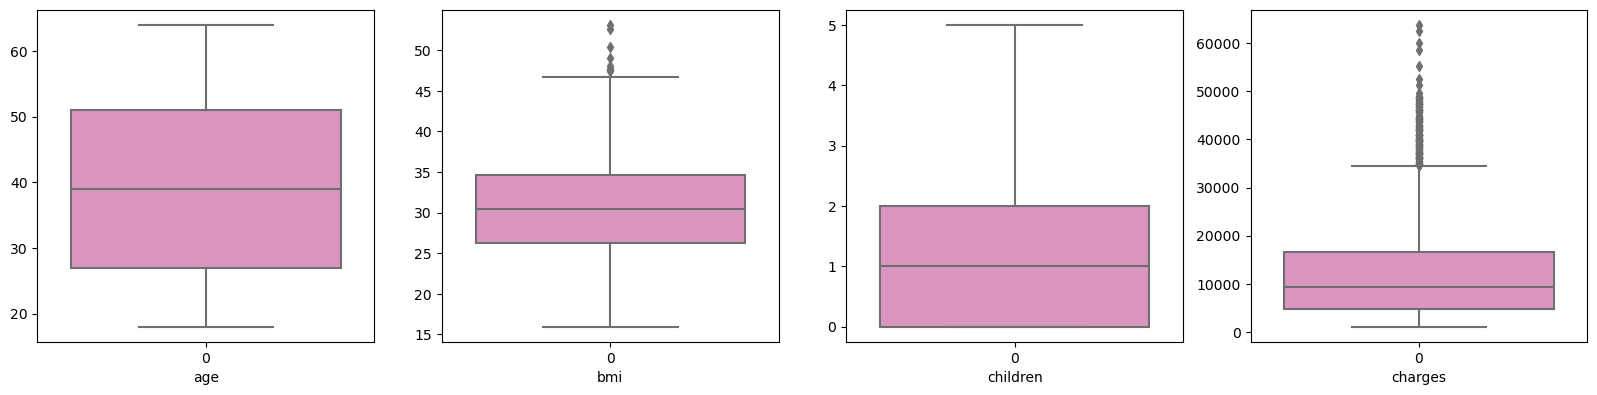

In [24]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
p=1
for i in numerical_col:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [25]:
from scipy.stats import zscore
out_features = df[['age', 'bmi', 'children']]
z=np.abs(zscore(out_features))
z

,age,bmi,children
0,1.438764,0.453320,0.908614
1,1.509965,0.509621,0.078767
2,0.797954,0.383307,1.580926
3,0.441948,1.305531,0.908614
4,0.513149,0.292556,0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,1.509965,0.206139,0.908614
1335,1.509965,1.014878,0.908614
1336,1.296362,0.797813,0.908614


In [26]:
#threshold = 3
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1],
       dtype=int64))

In [27]:
z.iloc[71,2]

3.240618711442044

In [28]:
#Now removing the data above Zscore and creating new DF
df1 = df[(z<3).all(axis=1)]

df1.shape

(1316, 7)

In [29]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
df=df1

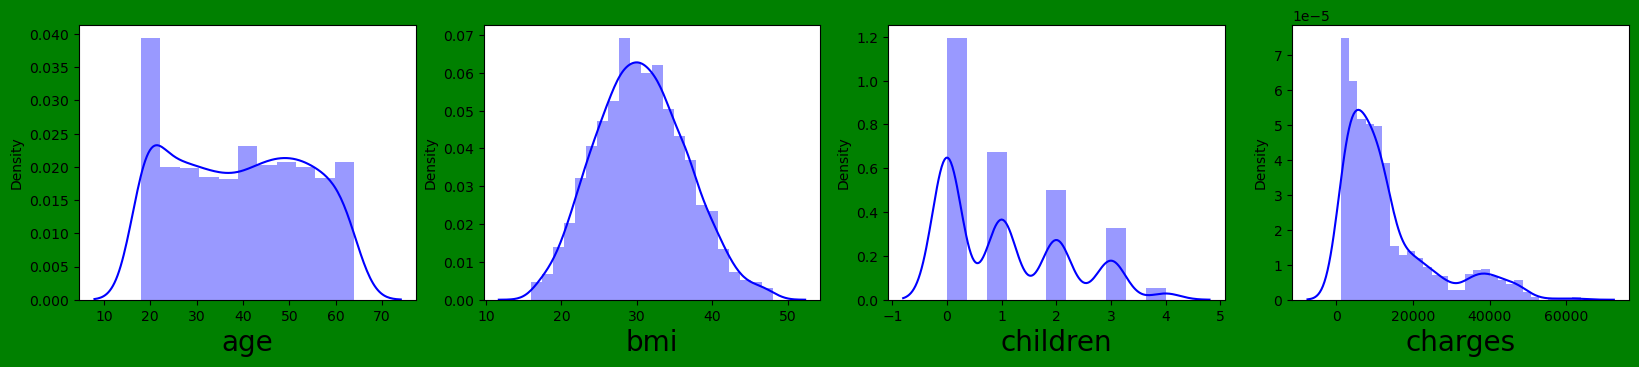

In [31]:
plt.figure(figsize = (20,25), facecolor='green')
plotnumber = 1

for column in numerical_col:
    if plotnumber <=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [32]:
#Checking for skewness
df[['age','bmi','children','charges']].skew()

age         0.049904
bmi         0.193564
children    0.740881
charges     1.501055
dtype: float64

In [35]:
#Removing Skewness using Cuberoot method
df['children'] = np.cbrt(df['children'])

In [36]:
#Checking for skewness again
df[['age','bmi','children','charges']].skew()

age         0.049904
bmi         0.193564
children   -0.244760
charges     1.501055
dtype: float64

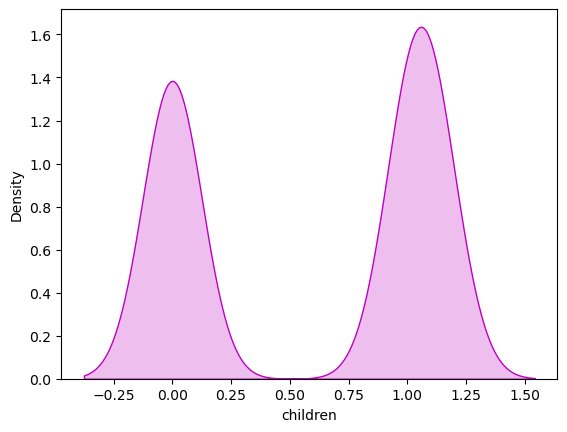

In [37]:
#Lets visualize how the data has been distributed in volume after removing skewness
sns.distplot(df['children'], color = 'm', kde_kws = {'shade':True}, hist = False)
plt.show()

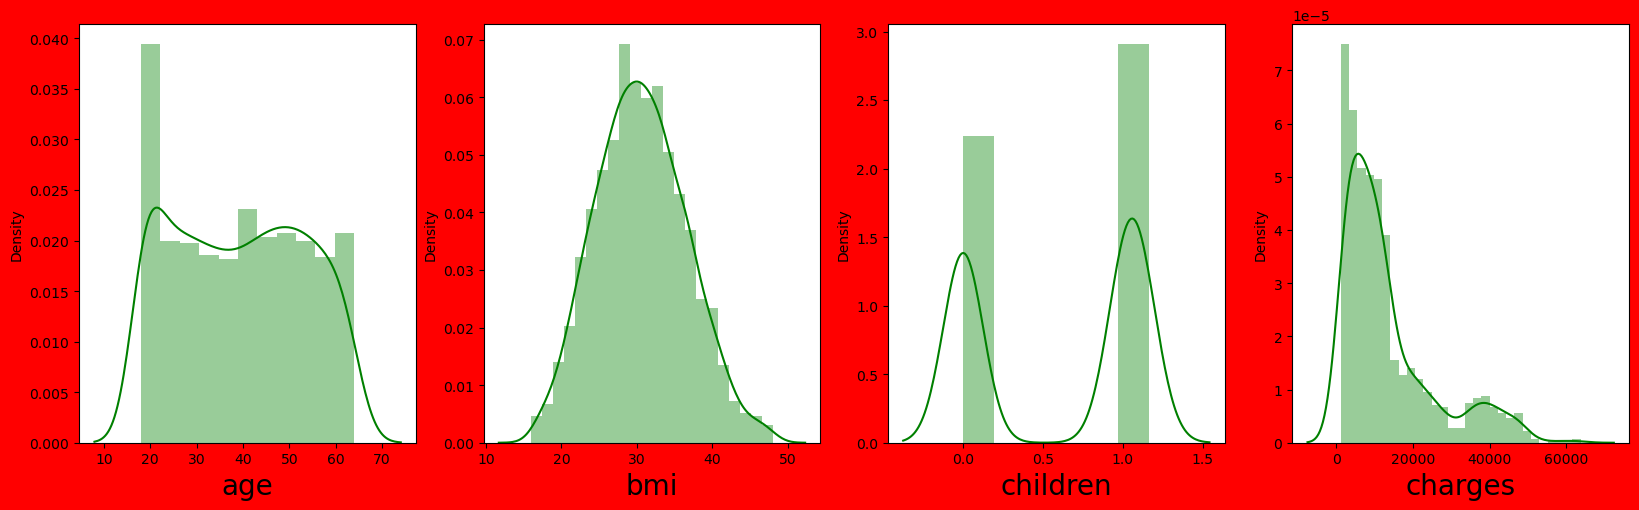

In [38]:
#Let us visualize again
plt.figure(figsize = (20,25), facecolor = 'red')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=13:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column], color='green')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [39]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [40]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0.000000,1.0,3.0,16884.92400
1,18,1.0,33.770,1.000000,0.0,2.0,1725.55230
2,28,1.0,33.000,1.129831,0.0,2.0,4449.46200
3,33,1.0,22.705,0.000000,0.0,1.0,21984.47061
4,32,1.0,28.880,0.000000,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,1.129831,0.0,1.0,10600.54830
1334,18,0.0,31.920,0.000000,0.0,0.0,2205.98080
1335,18,0.0,36.850,0.000000,0.0,2.0,1629.83350
1336,21,0.0,25.800,0.000000,0.0,3.0,2007.94500


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1316 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1316 non-null   int64  
 1   sex       1316 non-null   float64
 2   bmi       1316 non-null   float64
 3   children  1316 non-null   float64
 4   smoker    1316 non-null   float64
 5   region    1316 non-null   float64
 6   charges   1316 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [42]:
#Stastical summary of numerical
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,39.283435,0.503040,30.615186,0.598603,0.206687,1.506839,13326.893704
std,14.076955,0.500181,5.985924,0.526733,0.405083,1.104756,12152.973551
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.315000,0.000000,0.000000,1.000000,4719.193925
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9412.962500
75%,51.000000,1.000000,34.618750,1.080060,0.000000,2.000000,16924.528350
max,64.000000,1.000000,48.070000,1.166529,1.000000,3.000000,63770.428010


In [43]:
#Checking the correlation between features and the target
cor = df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017673,0.119062,0.054111,-0.025751,0.004741,0.299554
sex,-0.017673,1.000000,0.039934,0.014808,0.079468,0.006155,0.059243
bmi,0.119062,0.039934,1.000000,0.021663,0.004988,0.159535,0.203195
children,0.054111,0.014808,0.021663,1.000000,0.014778,0.006725,0.073005
smoker,-0.025751,0.079468,0.004988,0.014778,1.000000,-0.001462,0.786772
region,0.004741,0.006155,0.159535,0.006725,-0.001462,1.000000,-0.004410
charges,0.299554,0.059243,0.203195,0.073005,0.786772,-0.004410,1.000000


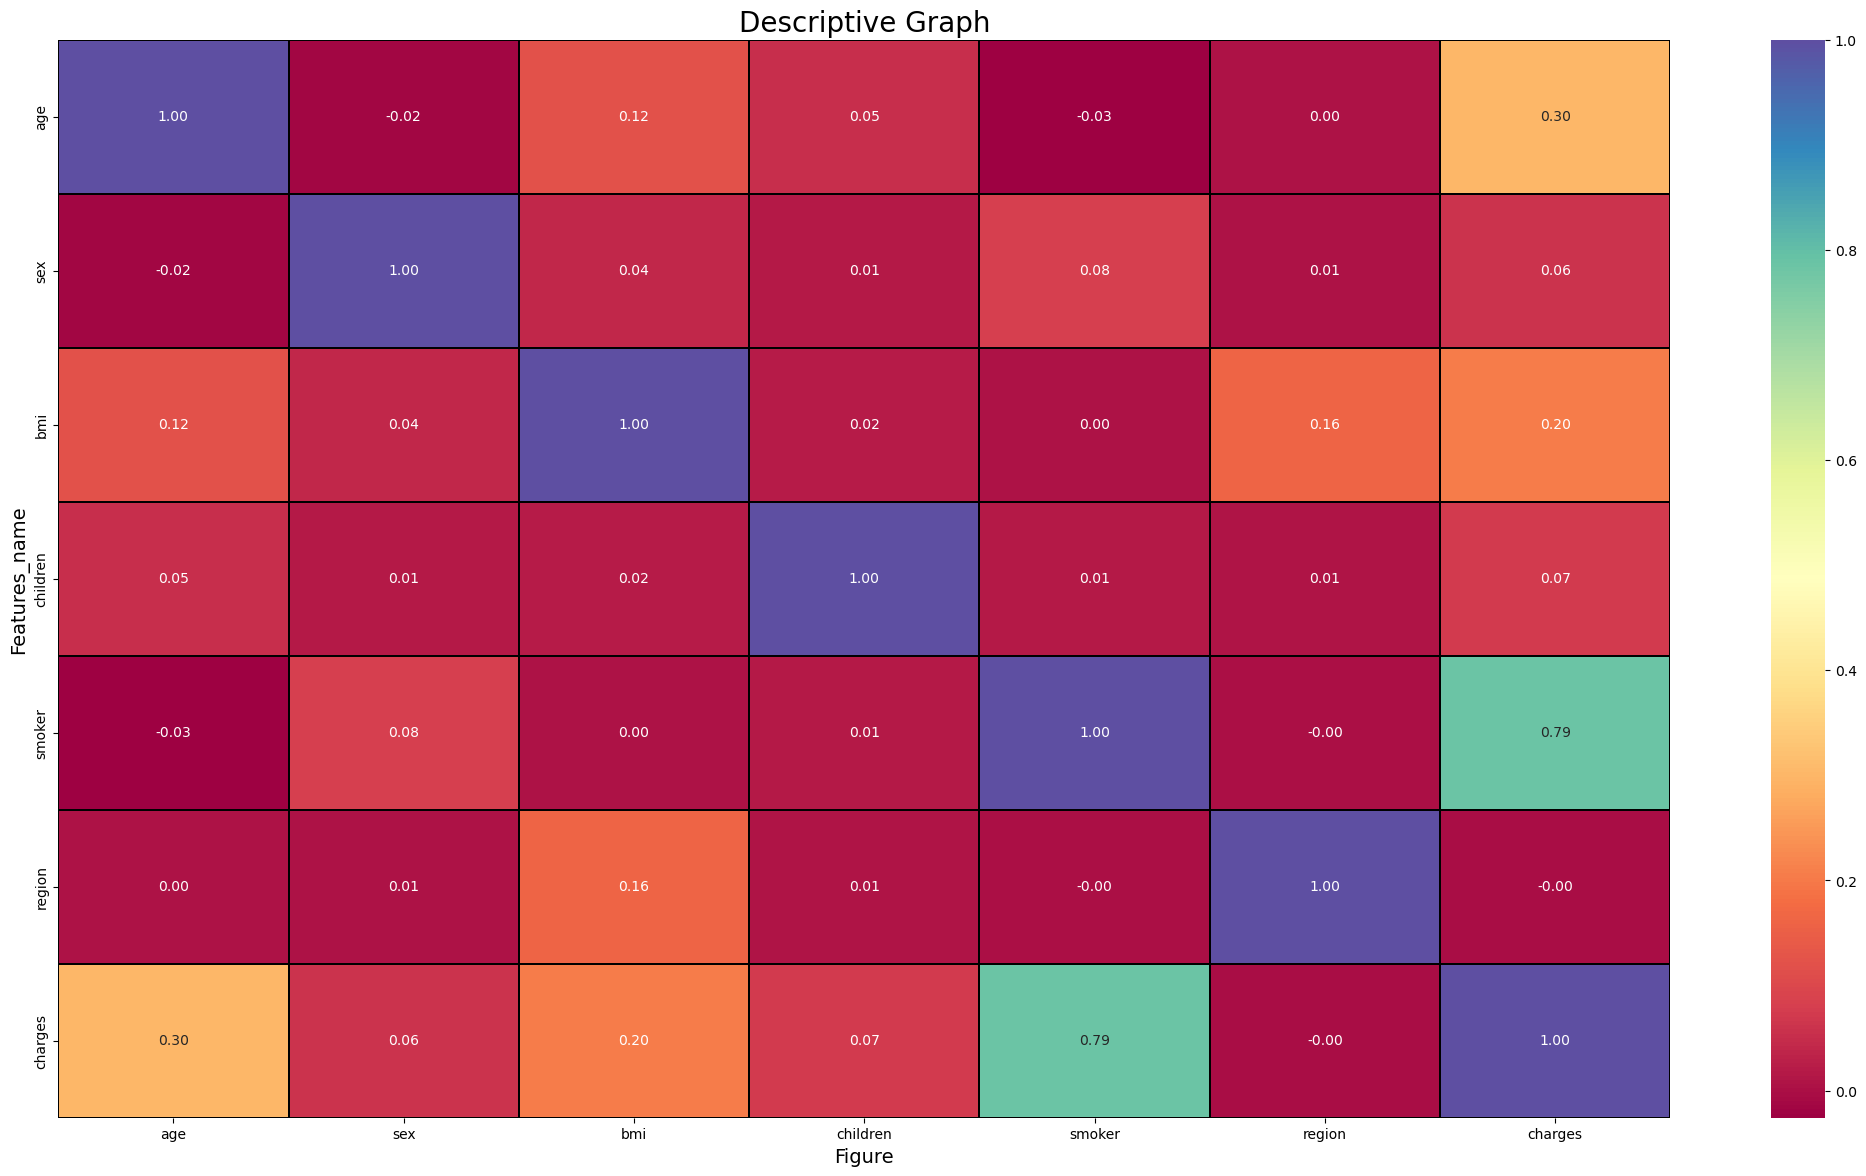

In [44]:
plt.figure (figsize = (26,14))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', linewidth = 0.2, linecolor = 'black', cmap = 'Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features_name', fontsize=14)
plt.title('Descriptive Graph', fontsize = 20)
plt.show()

In [45]:
df.corr().charges.sort_values()

region     -0.004410
sex         0.059243
children    0.073005
bmi         0.203195
age         0.299554
smoker      0.786772
charges     1.000000
Name: charges, dtype: float64

In [46]:
#Removing Skewness using Cuberoot method
df['smoker'] = np.cbrt(df['smoker'])

In [47]:
df.corr().charges.sort_values()

region     -0.004410
sex         0.059243
children    0.073005
bmi         0.203195
age         0.299554
smoker      0.786772
charges     1.000000
Name: charges, dtype: float64

In [48]:
#Seperating the independent and target variables into x and y

x = df.drop('charges', axis=1)
y = df['charges']

In [49]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [50]:
x

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-1.136875,1.959141,1.352089
1,-1.512509,0.993939,0.527239,0.762340,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.008917,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-1.136875,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-1.136875,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.008917,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-1.136875,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-1.136875,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-1.136875,-0.510428,1.352089


In [51]:
#Finding variance inflation factor in each column i.e. x.shape[1] (1/1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

In [52]:
vif

,VIF values,Features
0,1.018566,age
1,1.008564,sex
2,1.043124,bmi
3,1.003644,children
4,1.007211,smoker
5,1.026358,region


In [53]:
#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [54]:
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.8080742397900397 at random_state 38


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=maxRS)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [57]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.8080742397900397
R2_score on training Data: 72.16189027070453
Mean Absolute Error: 3996.5690851821405
Mean Squared Error: 30776098.76443884
Root mean squared error: 5547.621000432423


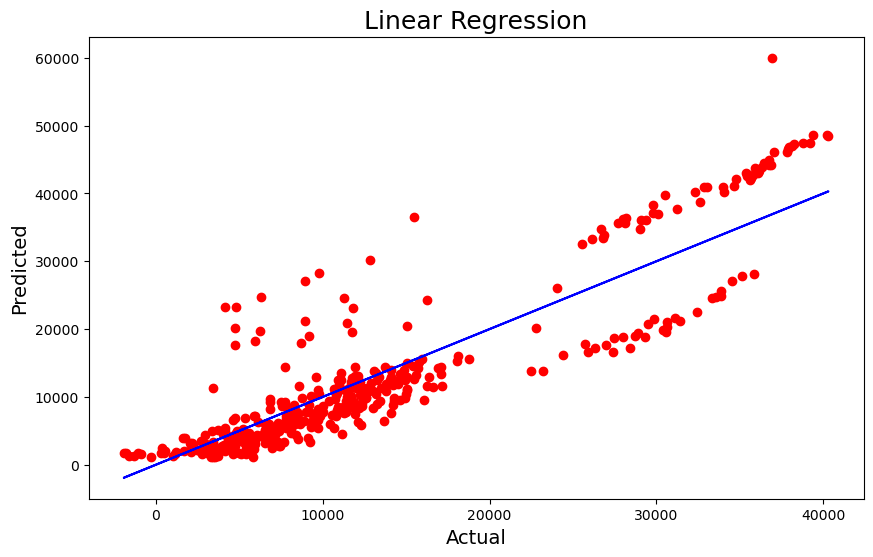

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR, y=y_test, color='r')
plt.plot(pred_LR, pred_LR, color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [59]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score:  0.8657989976109759
R2_score on training Data: 97.44155292014297
Mean Absolute Error: 2766.645674416355
Mean Squared Error: 21519692.29817309
Root mean squared error: 4638.932236859371


In [60]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score:  0.8434129298644694
R2_score on training Data: 85.1824967477575
Mean Absolute Error: 3219.598443347849
Mean Squared Error: 25109391.93599248
Root mean squared error: 5010.927253113188


In [61]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  0.8962614916365034
R2_score on training Data: 89.26054894404024
Mean Absolute Error: 2465.540924063544
Mean Squared Error: 16634903.910646848
Root mean squared error: 4078.5909221993384


In [62]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score:  0.8080680905089466
R2_score on training Data: 72.16188585107966
Mean Absolute Error: 3996.3883817765195
Mean Squared Error: 30777084.827393834
Root mean squared error: 5547.709872316128


In [63]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score:  0.807950563760724
R2_score on training Data: 72.16180064842992
Mean Absolute Error: 3999.1220999149477
Mean Squared Error: 30795930.733262863
Root mean squared error: 5549.408142609702


In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_dtr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score:  0.7644577701233066
R2_score on training Data: 100.0
Mean Absolute Error: 2904.8254089367088
Mean Squared Error: 37770182.18894137
Root mean squared error: 6145.745047505743


In [65]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  -0.08322485872267071
R2_score on training Data: -9.47084771661415
Mean Absolute Error: 8736.906538796704
Mean Squared Error: 173699638.8586618
Root mean squared error: 13179.515881042893


In [66]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_ETR = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_ETR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_score:  0.84722576631644
R2_score on training Data: 100.0
Mean Absolute Error: 2707.3162286010393
Mean Squared Error: 24497987.656076483
Root mean squared error: 4949.544186698052


In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
score = cross_val_score(LR, x, y, cv=5, scoring = 'r2')
print(score)
print(score.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_LR) - score.mean())*100)

[0.76099532 0.70780815 0.77790449 0.72632471 0.75850361]
<built-in method mean of numpy.ndarray object at 0x0000029ACB4ECA50>
Difference between R2 score and cross validation score is - 6.176698413767956


In [69]:
score1 = cross_val_score(RFR, x, y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_RFR) - score1.mean())*100)

[0.8487867  0.77596335 0.86523215 0.82448711 0.8533159 ]
<built-in method mean of numpy.ndarray object at 0x0000029ACC941EF0>
Difference between R2 score and cross validation score is - 3.2241955758671947


In [70]:
score2 = cross_val_score(knn, x, y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_knn) - score2.mean())*100)

[0.83230912 0.76948704 0.84211169 0.80656427 0.80980399]
<built-in method mean of numpy.ndarray object at 0x0000029ACB514810>
Difference between R2 score and cross validation score is - 3.13577087687561


In [71]:
score3 = cross_val_score(GBR, x, y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_GBR) - score3.mean())*100)

[0.87164009 0.79895265 0.88772168 0.84527707 0.86184625]
<built-in method mean of numpy.ndarray object at 0x0000029ACB49A550>
Difference between R2 score and cross validation score is - 4.317394472318414


In [72]:
score4 = cross_val_score(lasso, x, y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_lasso) - score4.mean())*100)

[0.7610014  0.70784324 0.77788268 0.72632086 0.75851198]
<built-in method mean of numpy.ndarray object at 0x0000029ACB4EC270>
Difference between R2 score and cross validation score is - 6.175605845465326


In [73]:
score5 = cross_val_score(rd, x, y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_rd) - score5.mean())*100)

[0.7610029  0.70791806 0.7777819  0.72640898 0.75845913]
<built-in method mean of numpy.ndarray object at 0x0000029ACB4EC4B0>
Difference between R2 score and cross validation score is - 6.163637221578632


In [74]:
score6 = cross_val_score(svr, x, y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_svr) - score6.mean())*100)

[-0.11320705 -0.10569181 -0.06990074 -0.10079583 -0.10758835]
<built-in method mean of numpy.ndarray object at 0x0000029ACB4ED470>
Difference between R2 score and cross validation score is - 1.6211895178241065


In [75]:
score7 = cross_val_score(etr, x, y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_ETR) - score7.mean())*100)

[0.83715116 0.74845621 0.84356701 0.80619996 0.8460708 ]
<built-in method mean of numpy.ndarray object at 0x0000029ACB4EC930>
Difference between R2 score and cross validation score is - 3.0936737644478907


In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param = {'alpha': [1.0, .05, .4, 2], 'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
        'positive':[False, True],
        'random_state': [1,4,10,20]
        
        }
gscv = GridSearchCV(Ridge(), param, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [78]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 4,
 'solver': 'sag'}

In [79]:
Model = Ridge(alpha = 2, fit_intercept=True, positive=False, random_state=4, solver = 'sag')

In [80]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score: ', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.8078260013977397
Mean Absolute Error: 4001.491966604749
Mean Squared Error: 30815904.829399537
Root mean squared error: 5551.20751092945


In [81]:
#Saving the model using .pk1
import joblib
joblib.dump(Model, "MedicalInsurance_Analysis.pk1")

['MedicalInsurance_Analysis.pk1']

In [82]:
#Lets load the saved model and get the predictions
model = joblib.load('MedicalInsurance_Analysis.pk1')

In [83]:
#Prediction
prediction = model.predict(x_test)
prediction

array([ 5251.37533099,  4080.95782709,  9720.06250823,  6829.19490147,
       37847.87796658, 16330.2322578 ,  3231.40179745,  5956.50851829,
       11433.68472506,  6859.53242974,  9313.23276725,  3106.44894275,
        8866.4823805 , 18782.33330824, 12342.81033983, 22450.70386916,
        3438.10194453,   587.71506764, 35845.06021387, 36881.24780669,
        8526.41986694, 11271.42847749, 10842.25545937,  4193.958386  ,
       12200.97217462,  5934.95906262,  2991.95980757,  3114.72917279,
        4763.03705158,  4179.35306699,  9788.2312247 , 11106.03899878,
       27976.49104177,  9729.46361971, 10854.40199075, 13044.61462913,
       29461.57335578, 10689.26654695,  6719.75096111,  4763.67192804,
        8122.7152966 , 14908.94594802,  4603.47523998,  2991.018893  ,
       11456.45222532, 13243.53962397, 14030.55078224, 25881.38220469,
        4171.26028913,  7781.82826827,   321.89865141,  6039.65163172,
       12365.85130241, 28125.26428343,  7378.32184165, 33523.42163326,
      

In [84]:
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,5251.375331,4661.28635
1,4080.957827,2867.11960
2,9720.062508,6571.54400
3,6829.194901,4149.73600
4,37847.877967,46599.10840
...,...,...
390,12680.028707,10806.83900
391,2108.501499,1815.87590
392,23162.745158,13747.87235
393,3723.638667,1263.24900
